# Can Machine Learning be used to effectively forecast the performance of aspiring NBA draft picks? - Joshua Adebayo 710012738

##Raw data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
college_stats = pd.read_csv("CollegeBasketballPlayers2009-2021.csv")

#college_stats.describe()
#college_stats.info()

<ipython-input-2-107ff59dbb0b>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  college_stats = pd.read_csv("CollegeBasketballPlayers2009-2021.csv")


College data found on Kaggle https://www.kaggle.com/code/bayunova/college-basketball-2009-2021-nba-advanced-stats/input

In [3]:
rookies = pd.read_csv("NBA Rookies by Year.csv")

# Data is used to extract players that made the NBA

rookies = rookies.rename({"Name":"player_name"}, axis = "columns")
rookies = rookies.drop(columns = ["index","Year Drafted"])
rookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  1538 non-null   object 
 1   GP           1538 non-null   float64
 2   MIN          1538 non-null   float64
 3   PTS          1538 non-null   float64
 4   FGM          1538 non-null   float64
 5   FGA          1538 non-null   float64
 6   FG%          1538 non-null   float64
 7   3P Made      1538 non-null   float64
 8   3PA          1538 non-null   float64
 9   3P%          1538 non-null   object 
 10  FTM          1538 non-null   float64
 11  FTA          1538 non-null   float64
 12  FT%          1538 non-null   float64
 13  OREB         1538 non-null   float64
 14  DREB         1538 non-null   float64
 15  REB          1538 non-null   float64
 16  AST          1538 non-null   float64
 17  STL          1538 non-null   float64
 18  BLK          1538 non-null   float64
 19  TOV   

 NBA Rookie found on Kaggle https://www.kaggle.com/code/mpwolke/pca-on-nba-rookies-performance/input?select=NBA+Rookies+by+Year.csv

## Data Cleaning

In [4]:
#Renaming column names
college_stats = college_stats.rename({"mp":"MIN","ast":"AST", "blk":"BLK", "pts":"PTS","stl":"STL","blk":"BLK","FT_per":"FT%",
                                      'oreb':'OREB', "dreb":"DREB", "treb":"REB","TPM":"3P Made","TPA":"3PA"}, axis = "columns")
college_stats = college_stats.drop(columns = ['rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
        'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)','rimmade', 'rimmade+rimmiss', 'midmade',
       'midmade+midmiss',"stops","yr","Unnamed: 64","Unnamed: 65", 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', "pick",'drtg', 'adrtg', 'dporpag',
       'bpm', 'obpm', 'dbpm', 'gbpm','team', 'conf','year', 'pid', 'type', 'Rec Rank', 'ast/tov',
        'num', 'porpag', 'adjoe', 'pfr','twoPM', 'twoPA', 'twoP_per',
          'ogbpm', 'dgbpm','Min_per', 'Ortg','TP_per', 'blk_per', 'stl_per',
                                              'ftr', 'ht',"usg"])
college_stats.columns

Index(['player_name', 'GP', 'FTM', 'FTA', 'FT%', '3P Made', '3PA', 'MIN',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'PTS'],
      dtype='object')

In [5]:
college_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  61061 non-null  object 
 1   GP           61061 non-null  int64  
 2   FTM          61061 non-null  int64  
 3   FTA          61061 non-null  int64  
 4   FT%          61061 non-null  float64
 5   3P Made      61061 non-null  int64  
 6   3PA          61061 non-null  int64  
 7   MIN          61023 non-null  float64
 8   OREB         61023 non-null  float64
 9   DREB         61023 non-null  float64
 10  REB          61023 non-null  float64
 11  AST          61023 non-null  float64
 12  STL          61023 non-null  float64
 13  BLK          61023 non-null  float64
 14  PTS          61023 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 7.0+ MB


In [6]:
#List of players selected to the All Rookie team their rooki year
#From the Official NBA website https://www.nba.com/news/history-all-rookie-teams

All_rookie = ["DeJuan Blair","Jonny Flynn","James Harden","Jonas Jerebko","Marcus Thornton","Darren Collison",
              "Stephen Curry","Tyreke Evans","Taj Gibson","Brandon Jennings","Eric Bledsoe","Derrick Favors",
              "Paul George","Wesley Johnson","Greg Monroe","DeMarcus Cousins","Landry Fields","Blake Griffin",
              "Gary Neal","John Wall","Chandler Parsons","Isaiah Thomas","MarShon Brooks","Derrick Williams",
              "Tristan Thompson","Kyrie Irving","Ricky Rubio","Kenneth Faried","Klay Thompson","Iman Shumpert",
              "Kawhi Leonard","Brandon Knight","Andre Drummond","Jonas Valanciunas","Michael Kidd-Gilchrist",
              "Kyle Singler","Tyler Zeller","Damian Lillard","Bradley Beal","Anthony Davis","Dion Waiters",
              "Harrison Barnes","Kelly Olynyk","Giannis Antetokounmpo","Gorgui Dieng","Cody Zeller","Steven Adams",
              "Michael Carter-Williams","Victor Oladipo","Trey Burke","Mason Plumlee","Tim Hardaway Jr.",
              "Marcus Smart","Zach LaVine","Bojan Bogdanovic","Jusuf Nurkic","Langston Galloway",
               "Andrew Wiggins","Nikola Mirotic","Nerlens Noel","Elfrid Payton","Jordan Clarkson","Justise Winslow",
              "D’Angelo Russell","Emmanuel Mudiay","Myles Turner","Willie Cauley-Stein","Karl-Anthony Towns",
              "Kristaps Porzingis","Devin Booker","Nikola Jokic","Jahlil Okafor",]

In [7]:
college_nba = college_stats.merge(rookies, on = "player_name", how="inner", suffixes=(["","_RY"]))
unique_college_nba= college_nba.drop_duplicates(subset=["player_name"])
unique_college_nba.columns

Index(['player_name', 'GP', 'FTM', 'FTA', 'FT%', '3P Made', '3PA', 'MIN',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'GP_RY', 'MIN_RY',
       'PTS_RY', 'FGM', 'FGA', 'FG%', '3P Made_RY', '3PA_RY', '3P%', 'FTM_RY',
       'FTA_RY', 'FT%_RY', 'OREB_RY', 'DREB_RY', 'REB_RY', 'AST_RY', 'STL_RY',
       'BLK_RY', 'TOV', 'EFF'],
      dtype='object')

In [8]:
# Merging the datasets to leave the players who made it to the NBA

In [9]:
unique_college_nba = unique_college_nba.drop(['GP_RY', 'MIN_RY',
       'PTS_RY', 'FGM', 'FGA', 'FG%', '3P Made_RY', '3PA_RY', '3P%', 'FTM_RY',
       'FTA_RY', 'FT%_RY', 'OREB_RY', 'DREB_RY', 'REB_RY', 'AST_RY', 'STL_RY',
       'BLK_RY', 'TOV', 'EFF'], axis = "columns")


#Only leaves college stats

In [10]:
unique_college_nba["All_Rookie"] = unique_college_nba["player_name"].apply(lambda x: x in All_rookie)
unique_college_nba = unique_college_nba.drop(["player_name"], axis = "columns")
#Add new column for if the player made the All Rookie team

In [11]:
unique_college_nba.head()

,GP,FTM,FTA,FT%,3P Made,3PA,MIN,OREB,DREB,REB,AST,STL,BLK,PTS,All_Rookie
0,33,64,114,0.561,0,0,22.9091,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,False
9,35,66,82,0.805,29,94,30.2857,1.3143,3.2286,4.5429,3.8286,1.7143,0.6857,7.0571,False
10,31,183,223,0.821,30,94,35.0323,0.9032,3.8387,4.7419,4.3226,1.4194,0.4516,19.5161,False
13,35,213,257,0.829,42,114,34.0286,1.3143,4.4286,5.7429,2.4571,1.2286,0.5143,18.3143,False
14,37,124,174,0.713,69,180,32.2703,3.0270,4.6486,7.6757,2.4054,1.5405,1.0270,16.4595,True


In [12]:
unique_college_nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 942
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GP          346 non-null    int64  
 1   FTM         346 non-null    int64  
 2   FTA         346 non-null    int64  
 3   FT%         346 non-null    float64
 4   3P Made     346 non-null    int64  
 5   3PA         346 non-null    int64  
 6   MIN         346 non-null    float64
 7   OREB        346 non-null    float64
 8   DREB        346 non-null    float64
 9   REB         346 non-null    float64
 10  AST         346 non-null    float64
 11  STL         346 non-null    float64
 12  BLK         346 non-null    float64
 13  PTS         346 non-null    float64
 14  All_Rookie  346 non-null    bool   
dtypes: bool(1), float64(9), int64(5)
memory usage: 40.9 KB


##Dimensionality Reduction - PCA

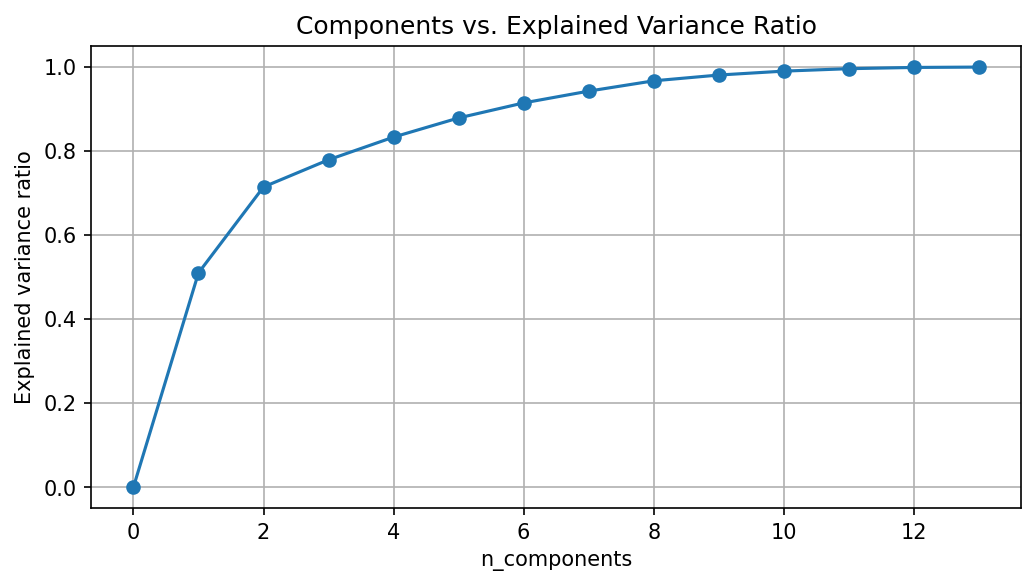

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

nums = np.arange(14)
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(unique_college_nba)

var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_df)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,4),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('Components vs. Explained Variance Ratio')

plt.savefig("Explained Variance Ratio")

###2D Approach

In [14]:
scaled_df = std_scaler.fit_transform(unique_college_nba)

pca = PCA(n_components=2)
frame_2D = pca.fit_transform(scaled_df)

df_2d = pd.DataFrame({'Component_1': frame_2D[:, 0], 'Component_2': frame_2D[:, 1],"All_Rookie" : unique_college_nba.All_Rookie})
df_2d.head()


,Component_1,Component_2,All_Rookie
0,-0.716985,1.040408,False
9,1.322680,-0.916904,False
10,3.401333,-1.228775,False
13,3.819395,-0.690196,False
14,4.168489,0.050644,True


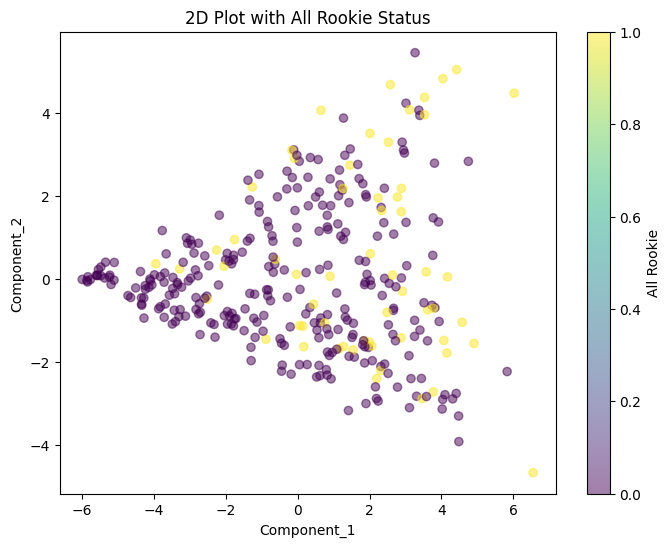

In [15]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x=df_2d.Component_1,y=df_2d.Component_2, c=df_2d.All_Rookie, alpha=0.5)
plt.title('2D Plot with All Rookie Status')
plt.xlabel('Component_1')
plt.ylabel('Component_2')
plt.colorbar(label='All Rookie')
plt.show()

###3D Approach

In [16]:

pca = PCA(n_components=3)
frame = pca.fit_transform(scaled_df)

In [17]:
df = pd.DataFrame({'Component_1': frame[:, 0], 'Component_2': frame[:, 1], 'Component_3': frame[:, 2], "All Rookie" : unique_college_nba.All_Rookie})
#df.to_csv("All_rookie_PCA")
df.head()

,Component_1,Component_2,Component_3,All Rookie
0,-0.716985,1.040408,-0.485224,False
9,1.322680,-0.916904,-0.282653,False
10,3.401333,-1.228775,-0.081418,False
13,3.819395,-0.690196,-0.554997,False
14,4.168489,0.050644,1.507229,True


In [18]:
df.groupby("All Rookie").mean().reset_index()

,All Rookie,Component_1,Component_2,Component_3
0,False,-0.368381,-0.094363,-0.377158
1,True,1.791957,0.459019,1.834650


<ipython-input-19-e201f461a557>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='All-Rookie Status (1=Top preformer)')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

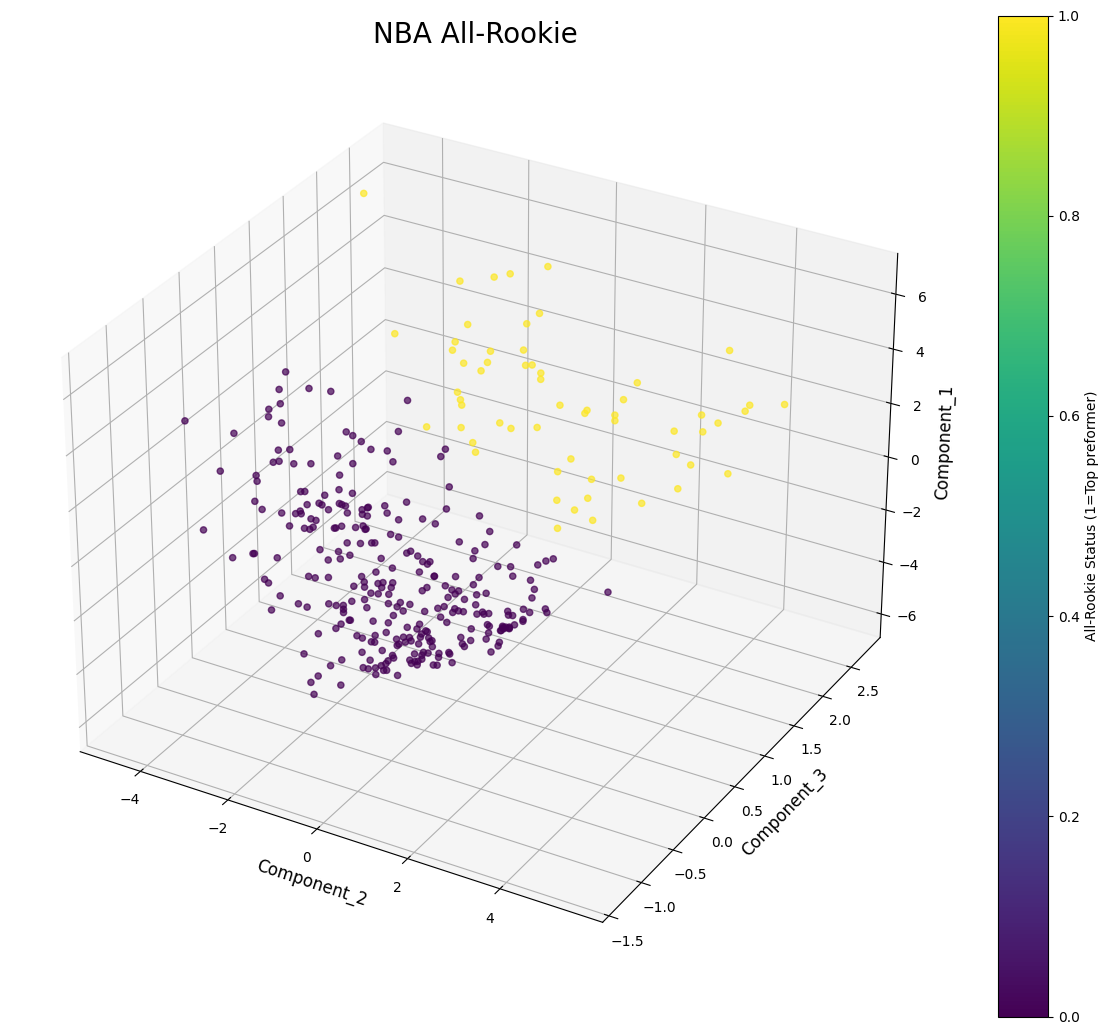

In [19]:
fig = plt.figure()

# defining all 3 axis
z = df.Component_1
x = df.Component_2
y = df.Component_3

# plotting

fig = plt.figure()

# syntax for 3-D projection
fig = plt.figure(figsize=(15, 13))
ax = plt.axes( projection ='3d')

# plotting

ax.scatter(x, y, z, c = df["All Rookie"], alpha = 0.7)

ax.set_title('NBA All-Rookie', fontsize = 20)
ax.set_xlabel('Component_2', fontsize=12)
ax.set_ylabel('Component_3', fontsize=12)
ax.set_zlabel('Component_1', fontsize=12)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
plt.colorbar(sm, label='All-Rookie Status (1=Top preformer)')

#plt.savefig("NBA_All_Rookie.png")
plt.show()

In [20]:
scaled_df = std_scaler.fit_transform(unique_college_nba)
pca = PCA(n_components=13)
frame = pca.fit_transform(scaled_df)

df = pd.DataFrame({
    'Component_1': frame[:, 0],
    'Component_2': frame[:, 1],
    'Component_3': frame[:, 2],
    'Component_4': frame[:, 3],
    'Component_5': frame[:, 4],
    'Component_6': frame[:, 5],
    'Component_7': frame[:, 6],
    'Component_8': frame[:, 7],
    'Component_9': frame[:, 8],
    'Component_10': frame[:, 9],
    'Component_11': frame[:, 10],
    'Component_12': frame[:, 11],
    'Component_13': frame[:, 12],
    "All Rookie": unique_college_nba.All_Rookie
})

##Experimental cell

I'd select the appropreate value for X, run the cell then proceed with the modelling.

In [21]:
#Experimental kernel for number of components
from sklearn.model_selection import train_test_split


#X = df[['Component_1', 'Component_2', 'Component_3']]
#X = df[['Component_1', 'Component_2', 'Component_3', 'Component_4']]
X = df[['Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5']]
#X = df[['Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5','Component_6', 'Component_7', 'Component_8', 'Component_9', 'Component_10','Component_11', 'Component_12', 'Component_13']]

y = df['All Rookie']

X_train, X_test, y_train, y_test = train_test_split(X, y)

df.head(5)

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,All Rookie
0,-0.716985,1.040408,-0.485224,0.123968,-0.598323,-0.726651,-0.449452,-0.336038,-0.261677,0.175549,0.504264,-0.068067,-0.044762,False
9,1.322680,-0.916904,-0.282653,0.088600,-0.990369,1.692537,-0.332393,-0.264014,0.138425,-0.085043,-0.186917,-0.434645,0.011408,False
10,3.401333,-1.228775,-0.081418,1.203459,-1.489493,-0.778517,0.525564,0.813780,-0.086219,0.022890,0.144562,0.203820,0.079077,False
13,3.819395,-0.690196,-0.554997,0.721036,-0.678605,-1.704072,0.301893,0.731013,0.511061,0.357246,0.163718,-0.299896,-0.069603,False
14,4.168489,0.050644,1.507229,-0.681971,1.511841,-0.040761,-0.169940,-0.613248,0.288845,-0.338378,-0.774414,-0.270374,-0.086931,True


##Training /Testing Neural Network

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier as MLP

MLPClassifier = MLP(hidden_layer_sizes=(10), max_iter=50).fit(X_train, y_train)

y_pred = MLPClassifier.predict(X_test)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#print("Accuracy of all players:", accuracy)
#print("Precision of all players:", precision)
#print("Recall of all players:", recall)
#print("F1-score of all players:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


##Training/Testing Multivariate Logistical Regression

In [23]:
from sklearn.linear_model import LogisticRegression


# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#print("Accuracy of all players:", accuracy)
#print("Precision of all players:", precision)
#print("Recall of all players:", recall)
#print("F1-score of all players:", f1)

##Calculating Shapley Values

First I trained a LR with all 13 components and calculated the shapley values. After I used the scaled dataset with the known values.

After, as I trained each NN/LR I would also calculate the shapley values before moving onto the next test.

In [24]:
pip install shap

In [25]:
#SHAP
import shap
shap.initjs()

###Multivariate Logistical Regression

In [26]:
x_t = list(X_test.columns)
i = np.random.randint(low = 0, high = len(np.array(X_test)))

explainer_shap = shap.Explainer(model, X_test, feature_names = x_t)
shap_values = explainer_shap(X_test)

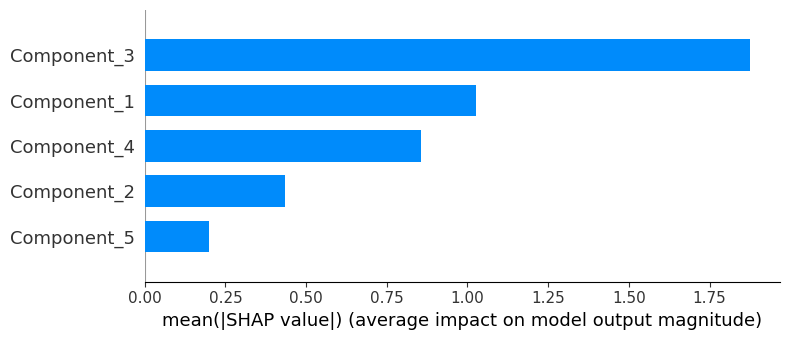

In [27]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.plots.force(shap_values[i])

###Neural Network

In [28]:
explainer = shap.KernelExplainer(MLPClassifier.predict, X_train)
shap_values = explainer(X_test)

  0%|          | 0/87 [00:00<?, ?it/s]

<Axes: xlabel='mean(|SHAP value|)'>

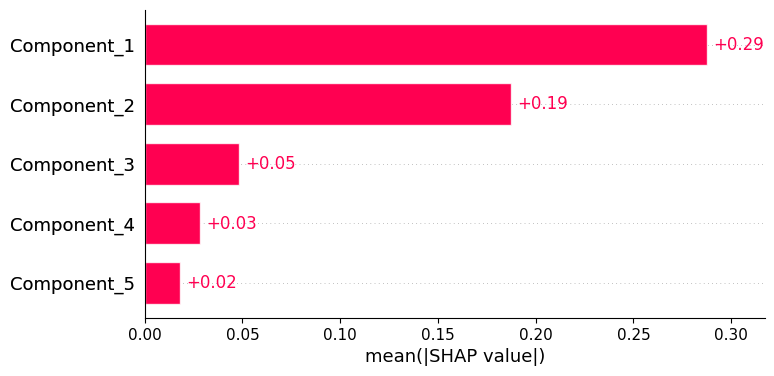

In [29]:
shap.plots.bar(shap_values,show=False)